# Metodo de Euler

## Iniciar paquetes del programa
Usamos la biblioteca **pandas** para mostrar resultados en tablas.

Usamos **matplotlib** para mostrar funcion en grafico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Definir funcion diferencial
Definimos las operaciones de la funcion diferencial en cuestion

In [2]:
def funcion(x:float):
    return 2*x

## Asignar valores iniciales
Asignamos el valor de h (diferencial de x), y valores iniciales de x e y.

Tambien hay que asignar la cantidad de iteraciones que queremos.

In [27]:
# Iteraciones:
i = 5

# Diferencial de x
h = .1

# X e Y iniciales:
x0 = 0
y0 = 0

## Ejecucion del algoritmo

In [50]:
# Definimos yi (yi-1 segun la notacion) para la funcion general
yi = funcion(x0)


# --------------------------------------------------------------


# Listas para utilizar en dataframe y grafico

# La lista xi contiene todos los xi a usar, desde antes de comenzar a iterar
# Los obtenemos a partir del metodo arange de numpy
xi = np.arange(x0,x0 + i*h,h)

# MUCHO CUIDADO: creamos un np array "empty", que en realidad contiene numeros aleatorios
# Hay que asegurarse de sobreescribir todos durante la iteracion
lista_y = np.empty(i)
# Este metodo redondea sus valores a 2 decimales
np.around(lista_y,2)
# Lo hacemos tambien con xi por un error
np.around(xi,2)

# Error aproximado
error = np.zeros(i)


# ---------------------------------------------------------------------


# Iteracion

for n in range(i):
    
    # Usamos la funcion general
    lista_y[n] = yi + h * funcion(xi[n])

    # Asignamos el error aproximado
    if n > 0:
        error[n] = 100 * (lista_y[n] - lista_y[n-1]) / lista_y[n]
    # Reasignamos el proximo valor yi (o yi-1 segun la notacion)
    yi = lista_y[n]

np.around(error,2)

# Inicializamos el dataframe que llenaremos con datos de la iteracion
df = pd.DataFrame({
    'x': xi,
    'y': lista_y,
    'error aprox': error
})

# Mostramos resultado
print(df)

     x     y  error aprox
0  0.0  0.00     0.000000
1  0.1  0.02   100.000000
2  0.2  0.06    66.666667
3  0.3  0.12    50.000000
4  0.4  0.20    40.000000


## Mostramos grafico
Simplemente ejecutar el codigo para ver graficamente el resultado

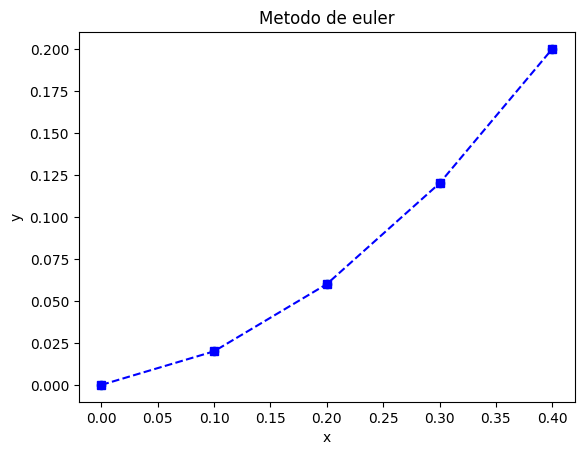

In [44]:
plt.title('Metodo de euler')
plt.xlabel('x')
plt.ylabel('y')

## Puntos
plt.scatter(xi,lista_y)
# Union de los puntos
plt.plot(xi,lista_y,'s--b')